# The logic of hypothesis testing

Earlier in the term, we took a first look at the problem of induction. Let's recap a couple of key points. First, we noted then that there were broadly two strategies for getting around the problem:

- Advocates of Bayesian inference promoted a model of scientific reasoning where we rank theories from most to least credible. We'll revisit this approach in a few classes.

- Karl Popper and a few others defended a deduction-only model of scientific reasoning. Science proceeds by eliminating bad hypotheses with refutation-style arguments. Whatever theories are left are "corroborated", meaning they have survived difficult tests. But they are not necessarily true. Formally, refutation arguments look like:

$$ H \supset O $$
$$ \thicksim O $$
$$ \therefore \, \thicksim H $$

Second, we noted that, usually, scientific theories do not strictly entail their evidence. Instead, they say the evidence should *probably* look like this or that. For example, if our hypothesis $H$ is that Lady Bristol doesn't possess the ability to distinguish milk-first and tea-first cups of tea, that theory doesn't exactly tell you how many cups she is suppose to get right. It doesn't even say it is impossible she gets makes 8 out 8 correct guesses. It just say there is a low probability that she gets that many right. So standard deductive logic can't help you refute the hypothesis Lady Bristol is just guessing.

However, we can extend our logical toolkit to get an inference that's pretty similar. Recall our notation for conditional probability:

$$ P(O|H) $$

Notice that conditional probabilities are a lot like logical conditional. $ H \supset O $ this sentence says 'if we assume H is true, then O must happen.' $ P(O|H) $ this sentence says 'if we assume H is true, then O happens with this probability'. Moreover, if $P(O|H)$ is low enough, it's an awful lot like $ \thicksim O$. It's like saying $O$ is almost impossible or $O$ didn't happen. So we get an analogy. If refutation arguments work to absolutely rule out certain hypotheses, we should also be able to partially rule out hypotheses. Partially ruling things out is what hypothesis testing does. However, we need to say more precisely what counts as "low enough." So now we turn to significance testing.

## P-values and significance thresholds

A **P-value** is the probability of the evidence, assuming some hypothesis. This just another way of saying a p-value is a conditional probability. We've already calculated a few. For example, this is a p-value:

$$ P(six \, cups \,|H) = 0.125 $$

And so is this:

$$ P(seven \, cups \,|H) = 0.03125 $$

In hypothesis testing, after calculating a p-value, you have to make a decision about what it means. As we just noted, $P(O|H)$ might be very low, but it's not zero. So the hypothesis still *could* be true, although it's unlikely. What we do is set a threshold - some p-values are so low, we'll decided our hypothesis is false. Often, that value is 0.05. But 0.05 is just conventional. The standard is called the significance threshold. We could set a more stringent standard or a more relaxed standard.

> If $P(O|H) < 0.05$, then we reject $H_0$

It is worth noticing that hypothesis testing arguments are not strictly valid. It all depends on a rough analogy to refutation. The fact that a very improbable thing happened doesn't mean $H$ is false. Sometimes improbable things *do* happen. What's really going on in the inference is that we are willing to take a risk that we've jumped to the wrong conclusion. Setting your significance threshold in different places helps you control how much risk you take. If you are willing to erroneously reject a lot of true theories, you can set it to be high. If you only want to reject theories when you have extremely strong evidence, set your threshold low.

## The hypothesis testing framework

At this point, we've walked through all the hypothesis testing steps. Let me make it explicit.

1. Formulate a hypothesis - Bristol has no special ability or, more specifically, the probability of success with each cup is 0.5.

2. Derive a probability distribution from your hypothesis. Enumeration, simulation and the binomial distribution formula* (coming up next) are all good ways of deriving this distribution.

3. Collect data. See how many cups Lady Bristol actually gets right.

4. Make a decision about your hypothesis..

When people talk about "statistically significant" results, this is what they mean. They mean that probability of the data showing up given some set of assumptions is very low. 

## Hypothesis testing illustrated

Let's look at a couple of examples to see how hypothesis testing does and doesn't work. The question we'll explore is, "how many cups does Bristol have to get correct before you should reject the idea she's just guessing. Let's start by reloading our model code from a prior class.

In [7]:
# packages we'll need

import numpy as np
import matplotlib.pyplot as plt

def simulate_bristol(a,n):
    '''Returns a list of 0s and 1s of lengeth n
    with 0 indicating failure and 1 indicating success.
    
    a = accuracy on each cup
    n = the number of cups'''

    experiment = []

    for i in range(n):
        
        outcome = np.random.choice([1,0],p=[a,1-a])
        experiment.append(outcome)
        
    return experiment

def run_experiments(a,n,precision):
    '''Returns a list containing the number of cups lady bristol
    guessed correctly over many experiments
    
    a = accuracy on each cup
    n = number of cups per experiment
    precision = the number of experiments'''
    
    
    all_trials = []

    for i in range(precision):

        correct = sum(simulate_bristol(a,n))
        all_trials.append(correct)

    return all_trials

Run that cell to get everything ready. Now we'll find the probability getting 6 cups out 8 again.

In [8]:
a = 0.5
n = 8
k = 6
precision = 10000

all_trials = run_experiments(a,n,precision)
matches = all_trials.count(k)
prob = matches / precision
prob

0.1129

It is around 0.1, which is greater than 0.05. So we do not reject the hypothesis. In other words, we don't have enough evidence to rule out the idea she's just guessing. But imagine she got 7 cups correct.

In [9]:
a = 0.5
n = 8
k = 7
precision = 10000

all_trials = run_experiments(a,n,precision)
matches = all_trials.count(k)
prob = matches / precision
prob

0.0302

This probability is below 0.05 so we can reject our hypothesis.

We can draw a convenient graph to understand what kind of evidence would be statistically significant in different situations. So everything below the line counts as statistically significant and everything above the line wouldn't be sufficient evidence.

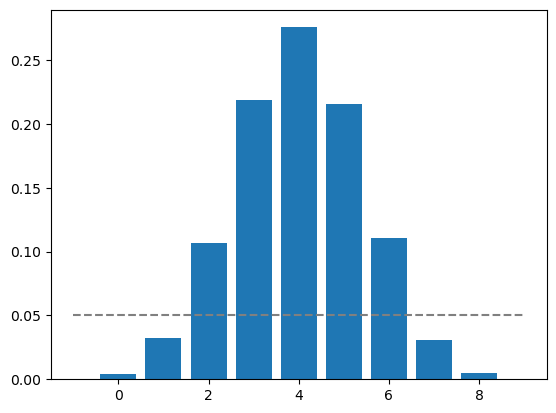

In [10]:
a = 0.5
n = 8
precision = 10000

all_trials = run_experiments(a,n,precision)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")

You'll see some new code `plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")`. Let me break it down. The first argument is a list `[-1,n+1]` which tells us the start and stop points for our line alone the x-axis. The second argument is the height of the line at both points `[0.05,0.05]`. The third argument `"--"` tells us the type of line, a dashed line. Finally, we can pass it a color with `color="grey"`. But you could put other words like blue or orange in the quotation marks.

This chart helps us illustrate two points. 

### Sample sizes

First, as the number of trials we put Lady Bristol through increases, so does the number of possible outcomes which could reject our hypothesis. Let's look at `n = 16`.

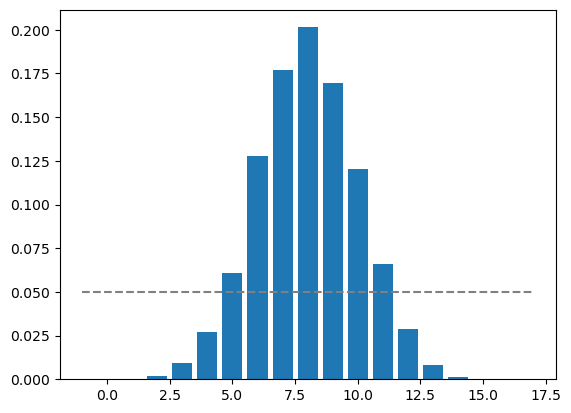

In [11]:
a = 0.5
n = 16
precision = 10000

all_trials = run_experiments(a,n,precision)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")

Now if she gets any more than 12 correct, that's statistically significant. A quick general lesson from this graph is: as the sample size of any study grows, it becomes easier and easier to reject the null hypothesis.

### Alternative null hypotheses

there is nothing special about `p=0.5` as our hypothesis. We can test hypotheses where she has some ability too. So let us imagine she's really good and `p=0.9`. 

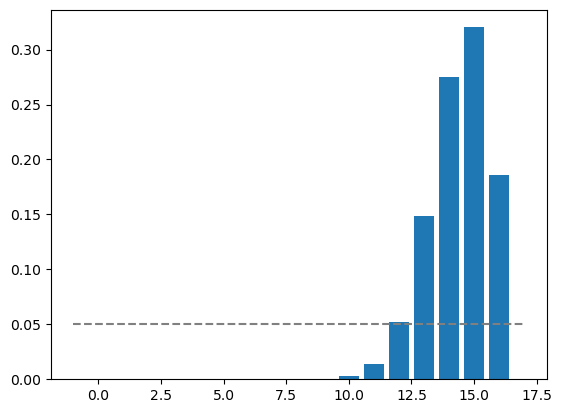

In [12]:
a = 0.9
n = 16
precision = 10000

all_trials = run_experiments(a,n,precision)
probs = []

for i in range(n+1):

    matches = all_trials.count(i)
    prob = matches / precision
    probs.append(prob)
    
plt.bar(range(n+1),probs)
plt.plot([-1,n+1],[0.05,0.05],'--',color="grey")

In this case, if she gets a moderate score like 12 / 16 correct, that's enough to reject our hypothesis.

There is a common misconception that hypothesis testing only works on so-called "null" hypotheses. That's usually the way it goes. But any hypothesis you can dream up can be tested in this manner as long as you have data and a model.

# Formula for probability distributions

We've been deriving our p-values in a very unusual way. Building a model and simulating it 10000 times isn't what people do in most statistics classes. Instead, they learn a variety of formulas that have special names and give you a fast, exact answer. If you've taken one of these classes before you might even recognize the distribution our model is generating as the *binomial distribution*. 

I want to briefly introduce the binomial distribution. I'll show you the formula just for kicks but we won't use it in this class. Then I'll show a way we can access the distribution in Python. But mostly what I want to do is explain why formulas are going to take a secondary priority for us in this class compared to simulations.

## The binomial formula

When we started studying the lady tasting tea problem, we enumerated all the way of getting 3 correct guesses out 4 tries. What if we had $k$ correct guesses out of $n$ attempts with probability $p$ of getting any given answer right? There is a little formula from combinatorics that tells us how to scale up to any size of problem.

$$ P(p,n,k) = \frac{n!}{k!(n-k)!} p^{k} (1-p)^{n-k} $$

It looks like a goddam mess. But we can break it down. The first part, $\frac{n!}{k!(n-k)!}$, gives us the number of ways of realizing a particular combination. Let's test it on a small example. If we want to know the number of ways to get three correct answers out of 4. According to the formula,

$$ \frac{4!}{3!(4-3)!} $$

$$ \frac{4!}{3!1!} $$

$$ \frac{4*3*2*1}{3*2*1*1} $$

$$ \frac{24}{6} $$

$$ 4 $$

Remember, that's what we found earlier with the enumeration again. There were 4 ways to get 3 correct answers out of 4 attempts. What's nice about this formula is that it scales up for extremely large experiments.

What's the second part? $p^{k}$ That's the probability of getting k correct guesses. If each correct guess has probability p, then you just multiple p by itself k times to get the conjunctive probability.

The third part, $(1-p)^{n-k}$ is just the reverse. (1-p) is the probability of getting an incorrect guess. n-k is just all the remaining events that aren't successes. 

Let's put it all together. The first part tells you how many ways there are realize a given state. The second and third part tell you the probability of realizing any of those ways. The main lesson here is just know there is a formula that lies beneath our Python functions. But we won't interact directly with the formula anymore.

## Binomial distributions in Python

Let's just start with the code.

In [13]:
import scipy.stats as stats

stats.binom(n=4,p=0.5).pmf(3)

0.25000000000000006

We have a new package, `scipy`. This gives us access to loads of probability distributions. In scipy, each distribution has a standard language for interacting with it. First, there is the name of the distribution. We have `binom` for binomial distribution. You pass it two arguments, `n` and `p`. Second, something funny happens. You use a `.` and call another method `pmf()`. It stands for probability mass function which is the official way of saying: what's the probability of this observation, assuming the binomial model. 

Normally we write out the name of our function and then wrap all our arguments in parentheses at the end. But here we do it in two separate places. That's because scipy functions always have two parts: the distribution itself (binomial, later we'll see normal) plus the thing we want our distribution to do (measure probability, later we'll take samples).

### Convergence between simulations and distributions

It is often the case that simulations we write correspond to some well-known, named probability distribution. It's no accident. Probability distributions are often invented because mathematicians start with some kind of story about how people or plants or particles behave and they work out a model. The extra step that mathematicians do, that we won't do, is work out the general behavior of their model using algebra. That's a tough skill and cognitive scientists can't know how to do everything. So learning simulations is good enough for our purposes. But it can be helpful to discover that your simulation model coincides with a probability distribution that a French guy invented 100 years ago.

Let's show that the binomial distribution and our simulation model exhibit the same behavior. We'll create the same bar chart as before.

<BarContainer object of 9 artists>

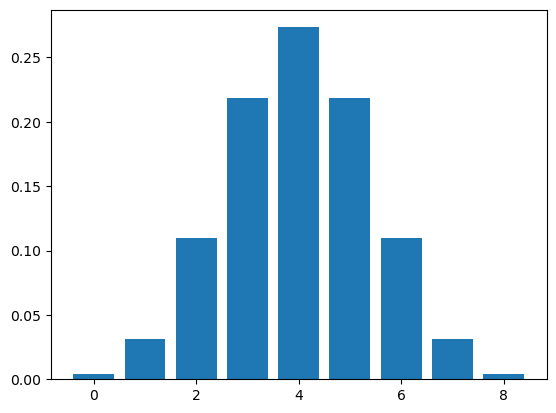

In [14]:
n = 8
p = 0.5

outcomes = list(range(n+1))
probs = stats.binom(n=8,p=p).pmf(outcomes)

plt.bar(outcomes,probs)

What is going on in the code is that we have a list of possible outcomes (`[0,1,2,3,4,5,6,7,8]`) that we pass over to the `binom.pmf()` function. It asks the formula the probability of each outcome and gives us back a new list. Notice that before we had to use a loop to accomplished this goal. Scipy functions are smart and can guess that you probably want to loop here so it handles the looping under the hood.

This bar chart looks awfully familiar. But is it exactly the same distribution as we had before? We can study this question with a few examples and some plotting tricks.

<BarContainer object of 9 artists>

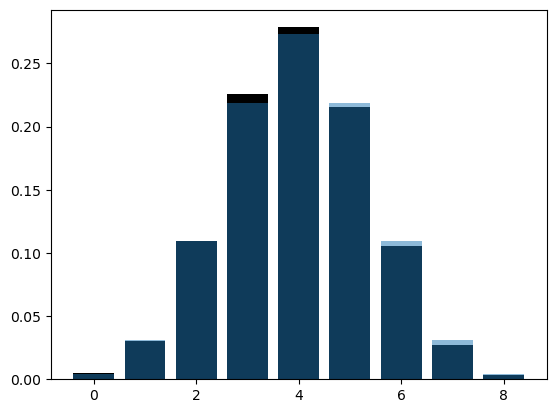

In [15]:
a = 0.5
n = 8
precision = 10000

outcomes = list(range(n+1))
probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_experiments(a,n,precision)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

Okay it looks like they are pretty close. I've adjusted the color settings so contrasts will stand out more. The little black bits are places where the simulation assigns more probability than the binomial distribution. The light blue bits are the reverse. Maybe they'll converge completely once we have higher precision.

<BarContainer object of 9 artists>

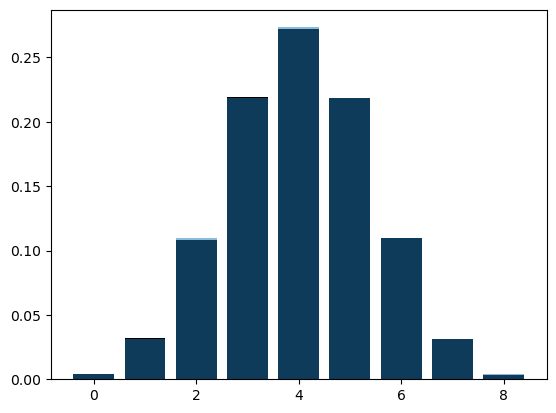

In [16]:
a = 0.5
n = 8
precision = 100000

outcomes = list(range(n+1))
probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_experiments(a,n,precision)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

The match gets a lot better. So that's a good sign. But we should explore the parameters too. When I make $p$ big or small, do both distributions continue to match closely?

<BarContainer object of 9 artists>

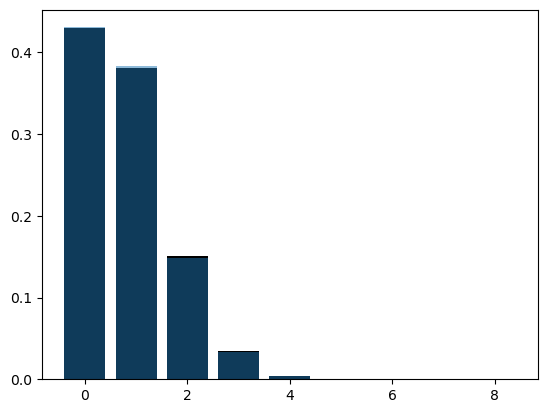

In [17]:
a = 0.1
n = 8
precision = 10000

outcomes = list(range(n+1))
probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_experiments(a,n,precision)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

<BarContainer object of 9 artists>

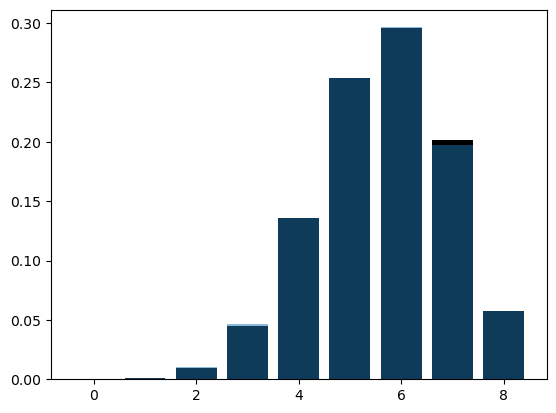

In [18]:
a = 0.7
n = 8
precision = 10000

outcomes = list(range(n+1))
probs_binom = stats.binom(n=n,p=a).pmf(outcomes)

all_trials = run_experiments(a,n,precision)
probs_sim = []

for i in outcomes:

    matches = all_trials.count(i)
    prob = matches / precision
    probs_sim.append(prob)
    
plt.bar(outcomes,probs_sim,alpha=1,color="black")
plt.bar(outcomes,probs_binom,alpha=0.5,color="tab:blue")

Yup looks like. So let's abstract our process: we got an initial sign of convergence. Then we tested it two different ways. We increased the precision. And we varied some of our parameters. In each case, the convergence continued to show up. So, roughly, we can infer they exhibit the same distribution.

A really good demonstration would also try varying `n`. So take a moment to do that. When `n` increases or decreases, do the two distributions continue to converge?

In [19]:
### Some code cells to study the n parameter with. Go ahead and try it.

## Sampling in scipy

One really nice features of simulations is that they can show us hypothetical experimental results. This let's us train our intuitions about the experimental context before we even run the experiment. Like this:

In [20]:
sum(simulate_bristol(0.5,8))

3

Scipy can do the same thing.

In [21]:
stats.binom(n=8,p=0.5).rvs()

4

`rvs()` stands for random value sample. So it gives you a random value according to the binomial distribution. This means it is a lot like `np.random.random()` and `np.random.choice()`. The difference between all these functions are the range of outcomes you might get and the probability distribution over those outcomes. We won't use sampling functions much right away but in the long run they'll be tremendously useful.

## My little rant about why the emphasis on mathematical formulas is harmful

I want to be clear this is a course in *computational modeling* and *computational statistics*, rather than a course in mathematical modeling and mathematical statistics. I do this for two reasons:

**First**, math constrains your imagination. 30 years ago, if you wanted to develop formal models in any science, your main weapon would be algebra. You would write down some assumptions, convert them to mathematical expressions and rearrange them until you discovered something compact and useful. It's an incredibly hard skill. It requires a tremendous amount of imagination and cleverness. Most scientists don't have the time or raw talent to also be trained as mathematicians. 

What happens instead is that scientists don't really build their own models. They hear about a model from someone else in their field and know of its uses. So psychologists might hear about the binomial distribution and how it can be used to measure experimental effects. But when a psychologist confronts a scentific process that doesn't conform to the binomial distribution, they often don't know where to go next. They cannot invent a variant of binomial distribution at will. So they either give up or pretend the binomial distribution is alright. Mathematical tools become inflexible over time as they are handed around throughout the scientific community. In a short while, we'll immediately see how common it is to confront processes that do not behave binomially.

Simulations by contrast admit much easier modifications. Proofs are unnecessary. Algebra is nice but also unnecessary. We can dream up far more in a computer simulation and implement it immediately than we can with math.

**Second**, it hides the causal story that lives beneath the model. The AI researcher Judea Pearl has often pointed out that humans are really good a reasoning *causally*. We are good at making up stories about why things happened. We aren't very good at reasoning mathematically. Math doesn't really have causal directions built into it. 

$$ y = a + b*x $$

You can interpret this expression as x causes y. But you can also interpret it as y causes x. Who is on which side of the equals sign doesn't actually matter. This is exactly the same expression but it makes y look more causal.

$$x = \frac{1}{b} (y - a) $$

Computer-simulation based models fit more closely with our natural style of reasoning. You tell a story. Then you encode that story into some code. You're good to go.

At rock bottom, mathematical probability distributions are also built on top of stories. But it's much harder to see what they are supposed to be. Only a really skilled thinker can look at this expression and see how it connects to a causal story about an algae scientist named Murial Bristol.

$$ P(p,n,k) = \frac{n!}{k!(n-k)!} p^{k} (1-p)^{n-k} $$

In this class, we want our attention to be one the stories we tell about human behavior, not on the mathematical abstractions that are built on top of those stories. Eventually it's nice to know that there are formula available. But we'll only help ourselves to the formula once we have the story clear.

# Robustness analysis

This brings us to our final topic of the lecture. Robustness analysis is when we adjust details of our story and see how the behavior of our model changes. All models involve some kind of simplifications. We assume things because they make the programming easier. Sometimes we assume things because we are pretty sure the world is like that, but we don't know for sure. In both cases, it can be helpful to revisit our assumptions and see if the behavior of the model changes a lot, a little, or not at all.

Recall the two big assumptions that went into the simulation. 

- On each cup, she has some level of accuracy.
- The accuracy stays constant throughout the course of the experiment.

We noted that the second assumption is questionable. When people have a skill, does that skill really stay constant as long as they use it? Suppose Lady Bristol tasted 100 cups of tea in one sitting. Do we think her accuracy on the first cup is equal to her accuracy on the 99th cup? No, of course not. We assumed it's constant on the promise that it won't make a big difference if her accuracy varied a little bit. But how much can it vary before that assumption leads us astray?

Think up a list of hypotheses about how people's ability for discernment might change over the course of the experiment. They don't have to be super realistic. They just have to be possible theories. We'll turn to assessing these theories latter on. I'm going to fill in the first one but you should a few of your own. The unit assessment will ask you to pick up one of your own theories and evaluate it.

- In basketball, sometimes people will say a player has "hot hands". When they get a few early baskets, their confidence goes up and they start playing really well. So it's like each time they score, their accuracy increases. Similarly, in Poker they have a phrase "going on tilt". An early loss will disrupt a player's concentration, hurt their confidence, and lead to further losses.
-
-
-


We'll leave off there. We'll start implementing the model first thing Wednesday.